**Task 1: Understanding the Limitations of RNNs and the Need for Transformers**

In [ ]:
!pip install nltk
!pip install wikipedia
!pip install datasets
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
!python -m spacy download en_core_web_sm

import random
import os
import pandas as pd
from nltk.corpus import stopwords
from datasets import load_dataset
import spacy
import kagglehub

nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.11/dist-packages/spacy/__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "/usr/local/lib/python3.11/dist-packages/spacy/errors.py", line 3, in <module>
    from .compat import Literal
  File "/usr/local/lib/python3.11/dist-packages/spacy/compat.py", line 4, in <module>
    from thinc.


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

In [ ]:
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

# Use the downloaded path to find the CSV file
for filename in os.listdir(path): # Changed dataset_dir to path
    if filename.endswith(".csv"):
        dataset_path = os.path.join(path, filename) # Changed dataset_dir to path
        break
else:
    raise FileNotFoundError("No CSV file found in the downloaded dataset directory.")

df = pd.read_csv(dataset_path)

# Print the column names to identify the correct column for text data
print(df.columns)

Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1
Index(['review', 'sentiment'], dtype='object')


In [ ]:
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 torchtext==0.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/1

In [ ]:
import torch
import torchtext
print("PyTorch:", torch.__version__)
print("TorchText:", torchtext.__version__)

PyTorch: 2.1.0+cu121
TorchText: 0.16.0+cpu


In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
# import pandas as pd
# import os
import kagglehub

# Re-download the IMDB dataset (if necessary) to get the correct path
imdb_dataset_path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

# Search for the CSV file within the IMDB dataset directory
for filename in os.listdir(imdb_dataset_path):
    if filename.endswith('.csv'):
        csv_path = os.path.join(imdb_dataset_path, filename)
        break
else:
    raise FileNotFoundError("No CSV file found in the downloaded IMDB dataset directory.")

# Now 'csv_path' should be defined correctly, so you can read the CSV:
df = pd.read_csv(csv_path)
df = df[['review', 'sentiment']]  # Keep only necessary columns
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
tokenizer = get_tokenizer('basic_english')

# Токенизация и подсчёт слов
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(df['review']),
                                   specials=['<pad>', '<unk>'])
vocab.set_default_index(vocab['<unk>'])  # если нужен fallback для неизвестных слов

In [ ]:
class IMDBDataset(Dataset):
    def __init__(self, df, vocab, tokenizer, max_len=200):
        self.texts = df['review'].tolist()
        self.labels = df['label'].tolist()
        self.vocab = vocab
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, idx):
        tokens = self.tokenizer(self.texts[idx])
        ids = [self.vocab[token] for token in tokens][:self.max_len]
        return torch.tensor(ids), torch.tensor(self.labels[idx], dtype=torch.float32)

    def __len__(self):
        return len(self.texts)

def collate_batch(batch):
    texts, labels = zip(*batch)
    texts = pad_sequence(texts, batch_first=True, padding_value=vocab['<pad>'])
    return texts, torch.stack(labels)

dataset = IMDBDataset(df.sample(2000), vocab, tokenizer)
loader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=collate_batch)

In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=vocab['<pad>'])
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        output, hidden = self.rnn(x)
        return torch.sigmoid(self.fc(hidden[-1]))

In [ ]:
class TransformerClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, hidden_dim, num_layers, num_classes=1, dropout=0.1):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_encoding = self._generate_positional_encoding(max_len=500, embed_dim=embed_dim).to(torch.float)

        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=hidden_dim, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.fc = nn.Linear(embed_dim, num_classes)
        self.sigmoid = nn.Sigmoid()

    def _generate_positional_encoding(self, max_len, embed_dim):
        pos = torch.arange(0, max_len).unsqueeze(1)
        i = torch.arange(0, embed_dim, 2)
        angle_rates = 1 / torch.pow(10000, (i.float() / embed_dim))
        angle_rads = pos * angle_rates
        pos_encoding = torch.zeros(max_len, embed_dim)
        pos_encoding[:, 0::2] = torch.sin(angle_rads)
        pos_encoding[:, 1::2] = torch.cos(angle_rads)
        return pos_encoding.unsqueeze(0)  # (1, max_len, embed_dim)

    def forward(self, x):
        seq_len = x.size(1)
        x = self.embedding(x) + self.pos_encoding[:, :seq_len, :].to(x.device)
        x = self.transformer(x)
        x = x.mean(dim=1)  # mean pooling
        x = self.fc(x)
        return self.sigmoid(x)

In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.24.4

In [ ]:
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Универсальная функция обучения модели
def train_model(model, loader, criterion, optimizer, device, num_epochs=10, model_name="Model"):
    model.to(device)
    losses = []
    accuracies = []
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        correct, total = 0, 0

        for batch_x, batch_y in loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            optimizer.zero_grad()
            predictions = model(batch_x).squeeze()
            loss = criterion(predictions, batch_y)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            predicted = (predictions > 0.5).float()
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

        accuracy = correct / total
        losses.append(epoch_loss)
        accuracies.append(accuracy)
        print(f"[{model_name}] Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Acc: {accuracy:.4f}")

    total_time = time.time() - start_time
    return losses, accuracies, total_time

In [ ]:
# RNN
rnn_model = SimpleRNN(len(vocab), embed_dim=64, hidden_dim=32)
rnn_optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
rnn_losses, rnn_accuracies, rnn_time = train_model(
    rnn_model, loader, nn.BCELoss(), rnn_optimizer, device, model_name="RNN"
)

# Transformer
transformer_model = TransformerClassifier(
    vocab_size=len(vocab),
    embed_dim=64,
    num_heads=4,
    hidden_dim=128,
    num_layers=2
)
transformer_optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001)
transformer_losses, transformer_accuracies, transformer_time = train_model(
    transformer_model, loader, nn.BCELoss(), transformer_optimizer, device, model_name="Transformer"
)

[RNN] Epoch 1/10 - Loss: 44.0455 - Acc: 0.5015
[RNN] Epoch 2/10 - Loss: 42.8815 - Acc: 0.5570
[RNN] Epoch 3/10 - Loss: 41.9844 - Acc: 0.5815
[RNN] Epoch 4/10 - Loss: 40.8569 - Acc: 0.6025
[RNN] Epoch 5/10 - Loss: 39.3499 - Acc: 0.6425
[RNN] Epoch 6/10 - Loss: 37.5778 - Acc: 0.6665
[RNN] Epoch 7/10 - Loss: 35.7226 - Acc: 0.6650
[RNN] Epoch 8/10 - Loss: 33.6655 - Acc: 0.6935
[RNN] Epoch 9/10 - Loss: 31.4866 - Acc: 0.7175
[RNN] Epoch 10/10 - Loss: 38.8074 - Acc: 0.7020
[Transformer] Epoch 1/10 - Loss: 44.3342 - Acc: 0.5000
[Transformer] Epoch 2/10 - Loss: 43.6839 - Acc: 0.5365
[Transformer] Epoch 3/10 - Loss: 42.6897 - Acc: 0.5835
[Transformer] Epoch 4/10 - Loss: 40.1017 - Acc: 0.6440
[Transformer] Epoch 5/10 - Loss: 35.4312 - Acc: 0.7380
[Transformer] Epoch 6/10 - Loss: 31.6117 - Acc: 0.7775
[Transformer] Epoch 7/10 - Loss: 27.3452 - Acc: 0.8215
[Transformer] Epoch 8/10 - Loss: 24.7213 - Acc: 0.8310
[Transformer] Epoch 9/10 - Loss: 22.1712 - Acc: 0.8555
[Transformer] Epoch 10/10 - Loss: 

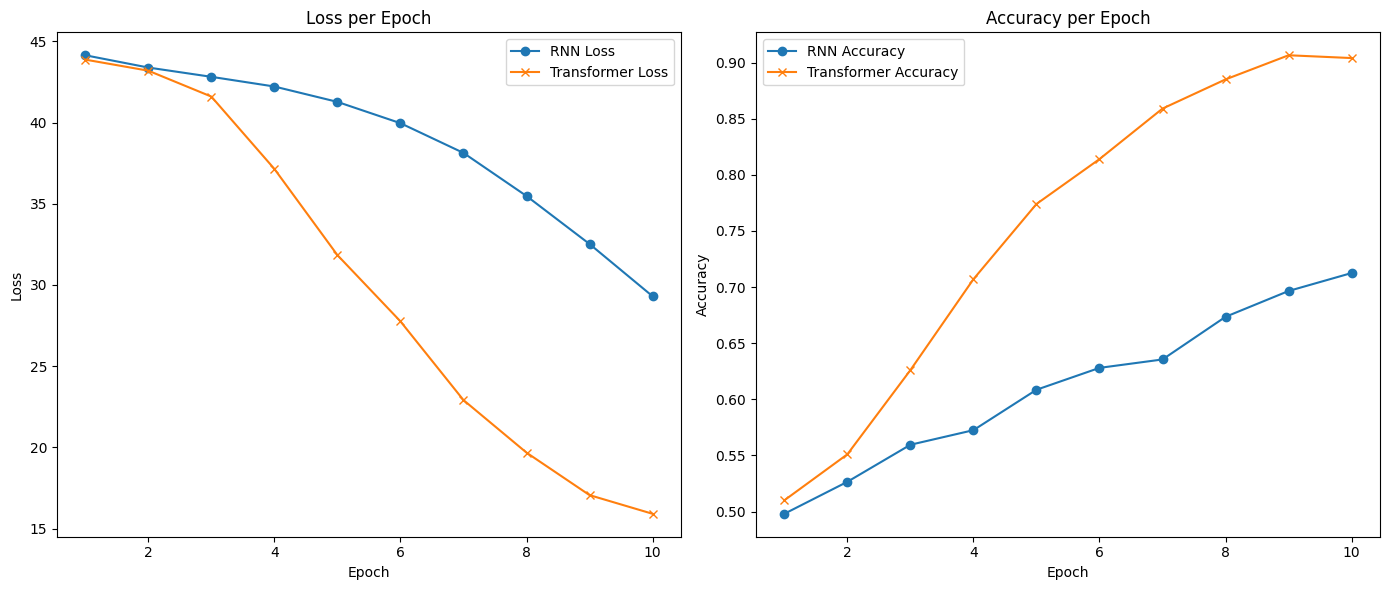

In [ ]:
epochs = range(1, len(rnn_losses)+1)

plt.figure(figsize=(14, 6))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(epochs, rnn_losses, label="RNN Loss", marker='o')
plt.plot(epochs, transformer_losses, label="Transformer Loss", marker='x')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(epochs, rnn_accuracies, label="RNN Accuracy", marker='o')
plt.plot(epochs, transformer_accuracies, label="Transformer Accuracy", marker='x')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(f"\n⏱️ Training Time:")
print(f"RNN:         {rnn_time:.2f} seconds")
print(f"Transformer: {transformer_time:.2f} seconds")


⏱️ Training Time:
RNN:         168.97 seconds
Transformer: 208.74 seconds


**Task 2: Self-Attention Mechanism**

In [ ]:
tokens = tokenizer(df.loc[0, "review"].lower())
token_ids = torch.tensor([vocab[token] for token in tokens]).unsqueeze(0)  # (1, seq_len)

def self_attention(x, d_k):
    Q = x @ W_q
    K = x @ W_k
    V = x @ W_v

    scores = Q @ K.transpose(-2, -1) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
    weights = F.softmax(scores, dim=-1)
    output = weights @ V
    return output, weights

# Параметры
embed_dim = 32
seq_len = token_ids.size(1)
d_k = embed_dim

embedding = torch.nn.Embedding(len(vocab), embed_dim)
x = embedding(token_ids)  # (1, seq_len, embed_dim)

# Инициализация весов
W_q = torch.nn.Parameter(torch.randn(embed_dim, embed_dim))
W_k = torch.nn.Parameter(torch.randn(embed_dim, embed_dim))
W_v = torch.nn.Parameter(torch.randn(embed_dim, embed_dim))

# Вызов внимания
output, attn_weights = self_attention(x.squeeze(0), d_k)  # (seq_len, embed_dim), (seq_len, seq_len)

In [ ]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

def self_attention(x, d_k):
    Q = x @ W_q
    K = x @ W_k
    V = x @ W_v

    scores = Q @ K.transpose(-2, -1) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
    weights = F.softmax(scores, dim=-1)
    output = weights @ V
    return output, weights

# Параметры
embed_dim = 32
seq_len = token_ids.size(1)
d_k = embed_dim

embedding = torch.nn.Embedding(len(vocab), embed_dim)
x = embedding(token_ids)  # (1, seq_len, embed_dim)

# Инициализация весов
W_q = torch.nn.Parameter(torch.randn(embed_dim, embed_dim))
W_k = torch.nn.Parameter(torch.randn(embed_dim, embed_dim))
W_v = torch.nn.Parameter(torch.randn(embed_dim, embed_dim))

# Вызов внимания
output, attn_weights = self_attention(x.squeeze(0), d_k)  # (seq_len, embed_dim), (seq_len, seq_len)

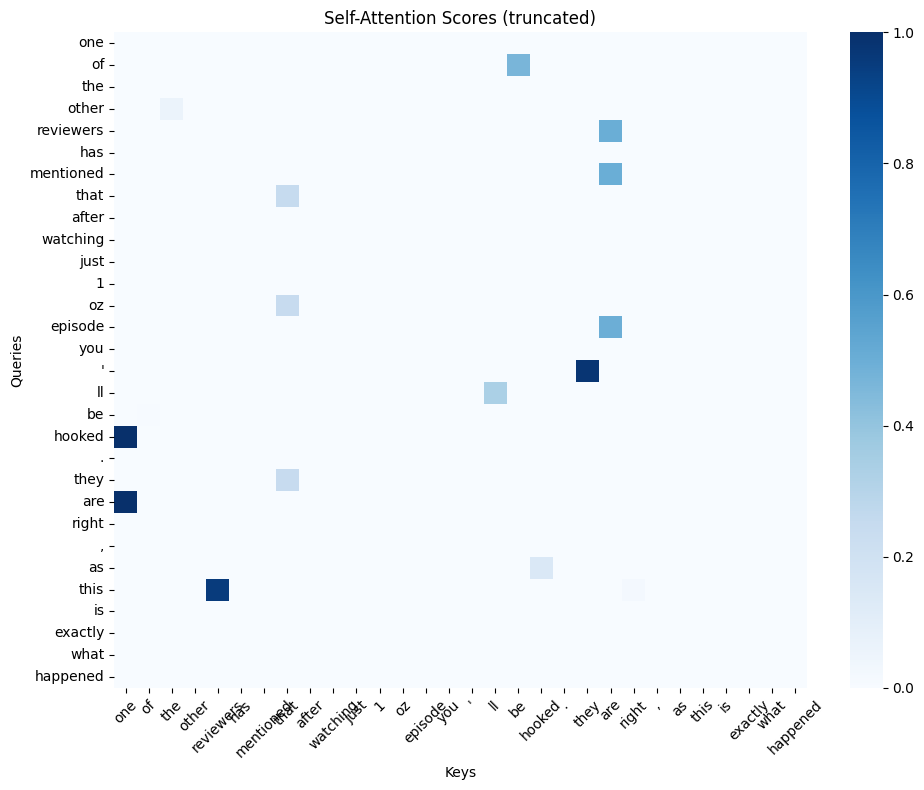

In [ ]:
max_tokens = 30
truncated_weights = attn_weights[:max_tokens, :max_tokens]
truncated_tokens = tokens[:max_tokens]

plt.figure(figsize=(10, 8))
sns.heatmap(truncated_weights.detach().numpy(),
            xticklabels=truncated_tokens,
            yticklabels=truncated_tokens,
            cmap="Blues")
plt.title("Self-Attention Scores (truncated)")
plt.xlabel("Keys")
plt.ylabel("Queries")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Task 3: Introduction to Transformer Architecture**

In [ ]:
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
df = pd.read_csv(path + "/IMDB Dataset.csv")
df = df.sample(5000, random_state=42).reset_index(drop=True)

train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=2048):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))  # (1, max_len, d_model)

    def forward(self, x):
        if x.size(1) > self.pe.size(1):
            raise ValueError(f"Input too long: {x.size(1)} > max_len ({self.pe.size(1)})")
        return x + self.pe[:, :x.size(1), :].to(x.device)


class TransformerTextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, hidden_dim, num_layers, max_len=512):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_encoding = PositionalEncoding(embed_dim, max_len)

        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=hidden_dim)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.classifier = nn.Sequential(
            nn.Linear(embed_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        embedded = self.embedding(x)  # (batch, seq_len, embed_dim)
        encoded = self.pos_encoding(embedded)
        encoded = encoded.permute(1, 0, 2)  # (seq_len, batch, embed_dim) for transformer
        output = self.transformer_encoder(encoded)
        output = output.mean(dim=0)  # mean pooling
        return self.classifier(output).squeeze()

In [ ]:
model = TransformerTextClassifier(
    vocab_size=len(vocab),
    embed_dim=64,
    num_heads=4,
    hidden_dim=128,
    num_layers=2
).to(device)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
# Токенизация
tokenized_texts = [tokenizer(text.lower()) for text in df['review']]
labels = torch.tensor([1 if label == "positive" else 0 for label in df['sentiment']], dtype=torch.float32)

# Конвертация в индексы
def encode(text):
    return torch.tensor([vocab[token] for token in text], dtype=torch.long)

encoded_texts = [encode(text) for text in tokenized_texts]

In [ ]:
from torch.utils.data import random_split

class IMDBDataset(Dataset):
    def __init__(self, encoded_texts, labels, max_len=512): # Add max_len
        self.data = encoded_texts
        self.labels = labels
        self.max_len = max_len # Store max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Truncate the sequence if it's longer than max_len
        return self.data[idx][:self.max_len], self.labels[idx]

def collate_fn(batch):
    texts, labels = zip(*batch)
    padded = pad_sequence(texts, batch_first=True, padding_value=vocab["<pad>"])
    # Truncate padded sequences to max_len
    padded = padded[:, :512]  # Assuming max_len is 512
    return padded, torch.tensor(labels)

dataset = IMDBDataset(encoded_texts, labels)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False, collate_fn=collate_fn)


In [ ]:
import torch.nn as nn
import torch.optim as optim
import time

model = TransformerTextClassifier(
    vocab_size=len(vocab),
    embed_dim=64,
    num_heads=4,
    hidden_dim=128,
    num_layers=2
).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(5):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        preds = model(batch_x)
        loss = criterion(preds, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = (preds > 0.5).float()
        correct += (predicted == batch_y).sum().item()
        total += batch_y.size(0)

    train_losses.append(total_loss)
    train_accs.append(correct / total)

    # Валидация
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            preds = model(batch_x)
            loss = criterion(preds, batch_y)
            val_loss += loss.item()
            predicted = (preds > 0.5).float()
            val_correct += (predicted == batch_y).sum().item()
            val_total += batch_y.size(0)

    val_losses.append(val_loss)
    val_accs.append(val_correct / val_total)

    print(f"Epoch {epoch+1} - Train Acc: {train_accs[-1]:.4f} - Val Acc: {val_accs[-1]:.4f}")

Epoch 1 - Train Acc: 0.5212 - Val Acc: 0.5590
Epoch 2 - Train Acc: 0.5640 - Val Acc: 0.5860
Epoch 3 - Train Acc: 0.6248 - Val Acc: 0.6330
Epoch 4 - Train Acc: 0.6408 - Val Acc: 0.6240
Epoch 5 - Train Acc: 0.6452 - Val Acc: 0.6140


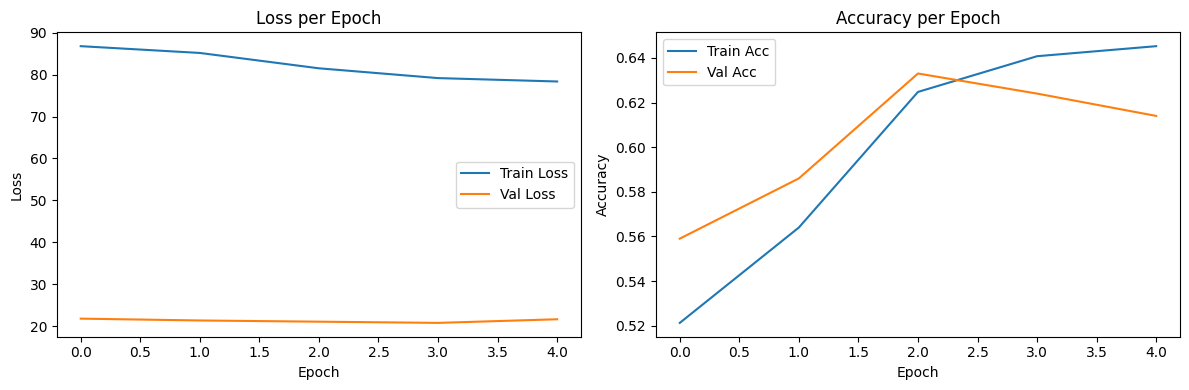

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()